In [2]:
from scipy.io import wavfile
import sounddevice as sd
import scipy
from scipy.signal import butter, kaiserord, lfilter, firwin, freqz
import math
from scipy.signal import freqz
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

In [6]:
samplerate, data = wavfile.read('sound1.wav')
data=data[:,0]
datatoF = Fourier(data, data.shape[0])

# Fourier & Inverse Fourier

In [7]:
def inverseFT(y):
    newData=ifft(y).real
    newData=np.around(newData, 2)
    newData= newData.astype(np.int16)
    return newData
     
def Fourier(y, N):        
    newData=fft(y)
    newData= 2.0/N * np.abs(newData[:N//2])
    return newData
     
def Phase_(y):
    data= fft(y)
    r = np.absolute(data)
    phase= np.angle((data.imag/r)/(data.real/r))
    return phase

# IIR Filter

In [8]:

def IIR(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.iirfilter(3, [low, high], rs=60, btype='band', ftype='butter')
    return b,a

def IIR_filter(data, lowcut, highcut, fs, order):
    b,a = IIR(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y    

# FIR Filter

In [9]:
def FIR( lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    width = 50.0/nyq
    ripple_db = 30.0
    N, beta = kaiserord(ripple_db, width)    
    b= signal.firwin(numtaps = order,width=width, cutoff=[low,high],window='hamming', nyq = nyq)
    return b

def FIR_filter(data, lowcut, highcut, fs, order):
    b = FIR(lowcut, highcut, fs, order=order)
    y = lfilter(b, 1, data)
    return y  

# Butter Worth

In [19]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# IIR Result

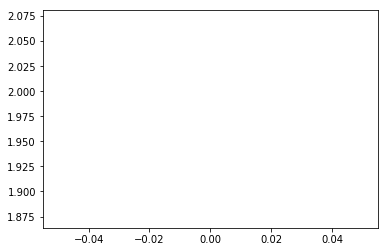

In [10]:
fs = 44100.0
order=3
a=[2756.25, 5512.5, 8268.75, 11025.0, 13781.25, 16537.5, 19293.75, 22050.0]
wo=22050.0

b1,a1 =IIR( 0, a[0], fs, order)
w, h1 = freqz( b1,a1, worN=wo)
         
b2,a2 = IIR( a[0], a[1], fs, order)
w, h2 = freqz( b2,a2, worN=wo)
         
b3,a3= IIR(a[1],a[2], fs, order)
w, h3 = freqz( b3,a3, worN=wo)
    
b4,a4= IIR( a[2], a[3], fs, order)
w, h4 = freqz( b4,a4, worN=wo)
         
b5,a5= IIR(a[3], a[4], fs, order)
w, h5 = freqz( b5,a5, worN=wo)
         
b6,a6= IIR(a[4], a[5], fs, order)
w, h6 = freqz( b6,a6, worN=wo)

b7,a7= IIR(a[5],a[6], fs, order)
w, h7 = freqz( b5,a5, worN=wo)
         
b8,a8= IIR(a[6], a[7], fs, order)
w, h8 = freqz( b6,a6, worN=wo)

r1= abs(h1)
r2= abs(h2)
r3= abs(h3)
r4= abs(h4)
r5= abs(h5)
r6= abs(h6)
r7= abs(h5)
r8= abs(h6)
r= r1+r2+r3+r4+r5+r6+r7+r8
w1=np.linspace(0,np.pi,r.shape[0])
plt.plot((fs * 0.5 / np.pi) * w1 ,(r))
plt.show()


In [11]:
I1 =IIR_filter(data,0, a[0], fs, order)
I2= IIR_filter(data,a[0], a[1], fs, order)
I3 = IIR_filter(data,a[1],a[2], fs, order)
I4 =IIR_filter(data, a[2], a[3], fs, order)
I5 =IIR_filter(data,a[3], a[4], fs, order)
I6 =IIR_filter(data,a[4], a[5], fs, order)
I7 =IIR_filter(data,a[5],a[6], fs, order)
I8 =IIR_filter(data,a[6], a[7], fs, order)

IIRr=I1+I2+I3+I4+I5+I6+I7+I8
IIR_inv= Fourier(IIRr, IIRr.shape[0])
sd.play(IIRr)

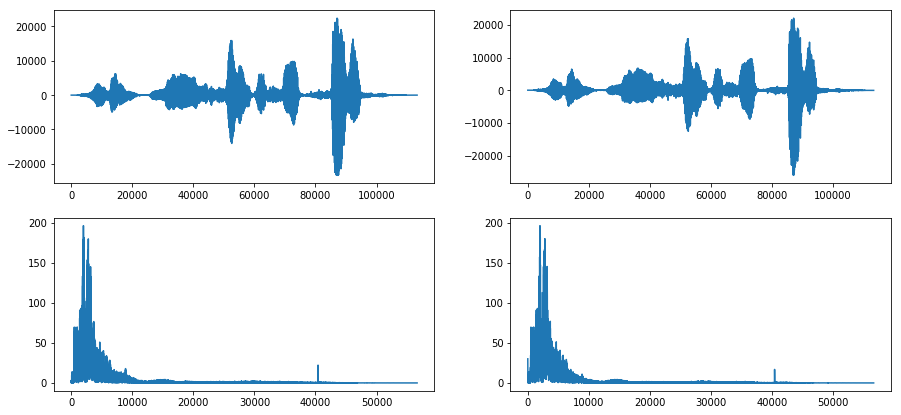

In [12]:
fig1 = plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.plot(data)
plt.subplot(2, 2, 2)
plt.plot(IIRr)

plt.subplot(2, 2, 3)
plt.plot(datatoF)
plt.subplot(2, 2, 4)
plt.plot(IIR_inv)
plt.show()

# FIR Result

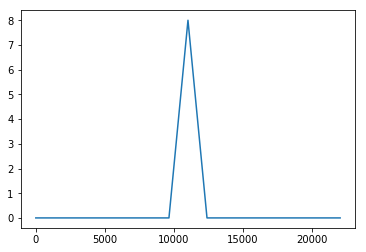

In [14]:
fs = 44100.0
order=17
a=[2756.25, 5512.5, 8268.75, 11025.0, 13781.25, 16537.5, 19293.75, 22050.0]
wo=22050

F1 =FIR( 1, a[0], fs, order)

         
F2= FIR( a[0], a[1], fs, order)

         
F3= FIR(a[1],a[2], fs, order)

    
F4= FIR( a[2], a[3], fs, order)

         
F5= FIR(a[3], a[4], fs, order)

         
F6= FIR(a[4], a[5], fs, order)


F7= FIR(a[5],a[6], fs, order)

         
F8= FIR(a[6], a[7], fs, order)



e=F1+F2+F3+F4+F5+F6+F7+F8
w1=np.linspace(0,np.pi,e.shape[0])
plt.plot((fs * 0.5 / np.pi) * w1 ,(e))
plt.show()

In [15]:
fs = 44100.0
order=17
a=[2756.25, 5512.5, 8268.75, 11025.0, 13781.25, 16537.5, 19293.75, 22050.0]
wo=2756

y1 =FIR_filter(data,1, a[0], fs, order)
y2= FIR_filter(data,a[0], a[1], fs, order)
y3 = FIR_filter(data,a[1],a[2], fs, order)
y4 =FIR_filter(data, a[2], a[3], fs, order)
y5 =FIR_filter(data,a[3], a[4], fs, order)
y6 =FIR_filter(data,a[4], a[5], fs, order)
y7 =FIR_filter(data,a[5],a[6], fs, order)
y8 =FIR_filter(data,a[6], a[7], fs, order)

FIRr=y1+y2+y3+y4+y5+y6
FIR_inv= Fourier(FIRr, FIRr.shape[0])
phase1=Phase_(FIRr)
sd.play(FIRr)


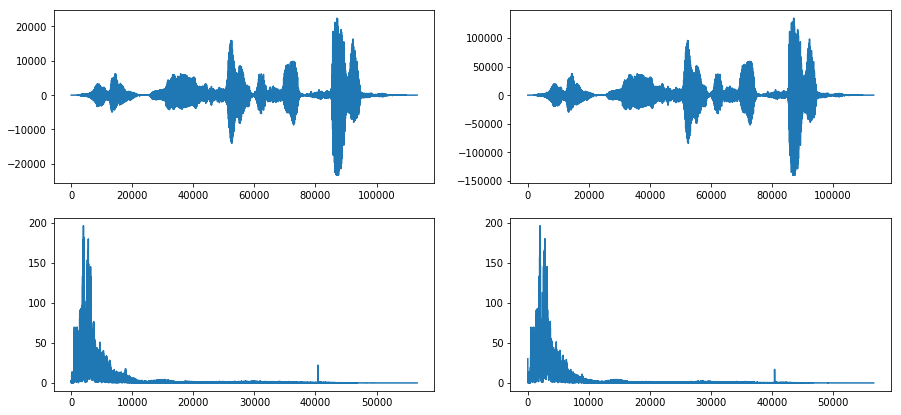

In [16]:
fig2 = plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.plot(data)
plt.subplot(2, 2, 2)
plt.plot(FIRr)

plt.subplot(2, 2, 3)
plt.plot(datatoF)
plt.subplot(2, 2, 4)
plt.plot(IIR_inv)
plt.show()



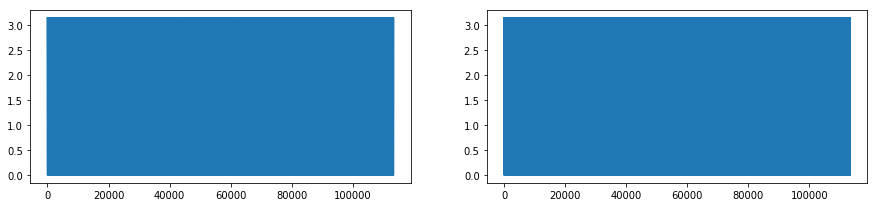

In [17]:
fige= plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.plot(Phase_(data))
plt.subplot(2, 2, 2)
plt.plot(phase1)
plt.show()